- Decision Tree
- Random Forest
- Ada Boost
- XGBoost
- Naive Bayes

---

- Grid search

---

- Score

accuracy_score (train, test)
/ F1 score (train, test)
/ Testing Recall Score
/ Test AUC score
/ Classification Report

- Plot confusion matrix
- Plot ROC curve
- Plot feature importance

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, roc_auc_score, roc_curve, auc

from sklearn import tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix
import pylab as pl
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

%matplotlib inline

## train and test groups

In [2]:

data = pd.read_csv('spambase.data', header=None)
data.rename(columns={57:'is_spam'}, inplace=True)

In [3]:

spam = data[data['is_spam'] == 1]
ham = data[data['is_spam'] == 0]

In [4]:

spam_train, spam_test = train_test_split(spam, train_size=0.6)
ham_train, ham_test = train_test_split(ham, train_size=0.6)

In [5]:
X_train = ham_train.append(spam_train)
y_train = X_train.pop('is_spam')

In [6]:
X_test = ham_test.append(spam_test)
y_test = X_test.pop('is_spam')

## Naive Bayes

In [7]:
spam_bayes = MultinomialNB()
spam_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
spam_bayes.score(X_test, y_test)

0.7676438653637351

In [9]:
spam_bayes.score(X_train, y_train)

0.7865168539325843

## Decision Tree

In [16]:

clf= DecisionTreeClassifier()
clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
y_pred = clf.predict(X_test)

In [18]:
# accuracy measure, AUC, a Confusion matrix:

# Calculate Accuracy 
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
# print('\nConfusion Matrix')
# print('----------------')
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :89.68512486427795

AUC is :0.9


In [19]:
precision_score(y_test, y_pred, average='weighted')

0.8995594607641205

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# pl.matshow(cm)
# pl.title('Confusion matrix of the classifier')
# pl.colorbar()
# pl.show()
cm

In [ ]:
plot_confusion_matrix(cm, classes=set(data['is_spam']), normalize=True,
                      title='Normalized confusion matrix')

## Random Forest

In [37]:
param_grid = {
    "n_estimators": [90, 100],
    'max_depth': [1,5,20],
}

In [44]:
grid_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='precision', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

training_precision = precision_score(y_train, training_preds)
val_precision = precision_score(y_test, val_preds)

print("")
print("Training Precision: {:.4}%".format(training_precision * 100))
print("Validation Precision: {:.4}%".format(val_precision * 100))

Grid Search found the following optimal parameters: 
max_depth: 1
n_estimators: 100

Training Accuracy: 84.99%
Validation accuracy: 83.98%

Training Precision: 97.6%
Validation Precision: 95.37%


In [45]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
y_pred = forest.predict(X_test)

Model Scores for:  

 ----> RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

Train Accuracy score:  0.8430590793765858
Test Accuracy score:  0.8376764386536374 

Train F1 score:  0.7552289429055965
Test F1 score:  0.7481044650379106 

Testing Precision Score:  0.9631236442516269
Testing Recall Score:  0.6115702479338843
Test AUC score:  0.7981686365117451 

Classification Report:  
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1116
           1       0.96      0.61      0.75       726

   micro avg       0.84      0.84      0.84      1842
   macro avg       0.

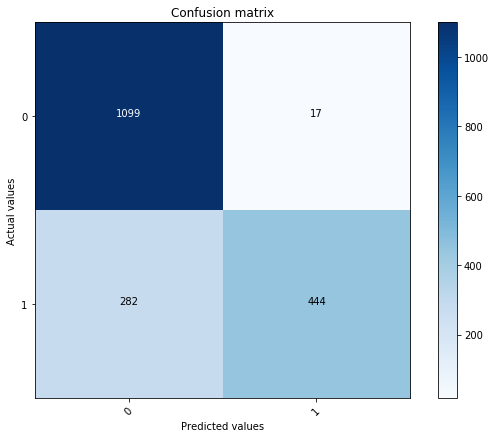

AUC (pred_proba):  0.9375296217305016


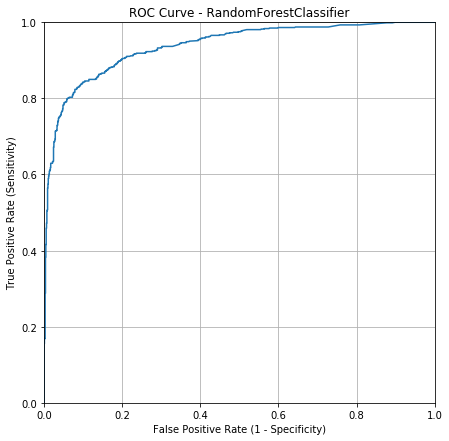

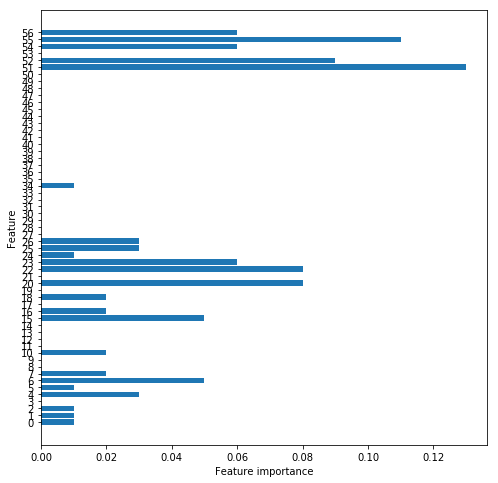

In [47]:
all_in_one_scorer(forest, X_train, X_test, y_train, y_test, y_pred)

## Ada Boost 

### Helper functions

In [25]:
def score_model(clf, X_train, X_test, y_train, y_test):
    
    print('Model Scores for: ', '\n\n','---->', clf, '\n')
    print('Train Accuracy score: ', accuracy_score(y_train, clf.predict(X_train)))
    print('Test Accuracy score: ', accuracy_score(y_test, clf.predict(X_test)),'\n')
    print('Train F1 score: ', f1_score(y_train, clf.predict(X_train)))
    print('Test F1 score: ', f1_score(y_test, clf.predict(X_test)), '\n')
    print("Testing Precision Score: ", precision_score(y_test, clf.predict(X_test)))
    print("Testing Recall Score: ", recall_score(y_test, clf.predict(X_test)))
    print('Test AUC score: ', roc_auc_score(y_test, clf.predict(X_test)), '\n')
    print('Classification Report: ', '\n', classification_report(y_test, clf.predict(X_test)), '\n')
    
    return #clf

In [26]:
def ROC_func(clf, X_test, y_test):
    
    y_pred_prob = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title(f'ROC Curve - {clf.__class__.__name__}')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

    print('AUC (pred_proba): ', roc_auc_score(y_test, y_pred_prob))

In [33]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#     #Add Normalization Option
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')
    plt.show()

In [29]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [34]:
def all_in_one_scorer(clf, X_train, X_test, y_train, y_test, y_pred):
    
    score_model(clf, X_train, X_test, y_train, y_test)
    plot_confusion_matrix(y_test, y_pred, classes=set(data['is_spam']))
    ROC_func(clf, X_test, y_test)
    plot_feature_importances(clf)
    
    return #clf